### Breast Cancer Wisconsin (Diagnostic) Data Set

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data   

Preliminary analysis is provided below 

1) Select a basic classifier and build a model on the breast cancer wisconsin dataset.  Record the confusion matrix.

2) Apply PCA to the features in the dataset, not the target value.   

3) Identify the number of principal components required to explain 90% of the data.    

4) Compare the results with your original model.  
      

# Imports

In [1]:
import pandas as pd
from IPython.display import HTML

raw_df = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/breast-cancer-wisconsin-data.csv")
HTML(raw_df.to_html())
print(raw_df.shape)
print(raw_df.dtypes)
raw_df.head(n=3)

(569, 33)
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


The id and Unnamed: 32 columns should be removed, since they are unnecessary. The dataset will be also examined for missing values, duplicated entries and unique values of 'diagnosis' column.

In [0]:
# Remove unnecessary columns
df = raw_df.drop(columns= ['id', 'Unnamed: 32'])

In [3]:

# Find the unique values of 'diagnosis'.
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

#### Data exploration

In [4]:
# Generate statistics
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Plot pairwise relationships to check the correlations between the mean features.

In [0]:
meanval = [ 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

In [6]:
corrmtx = df[meanval].corr()
corrmtx

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


Next, a heatmap will be used to present the numerical correlations.

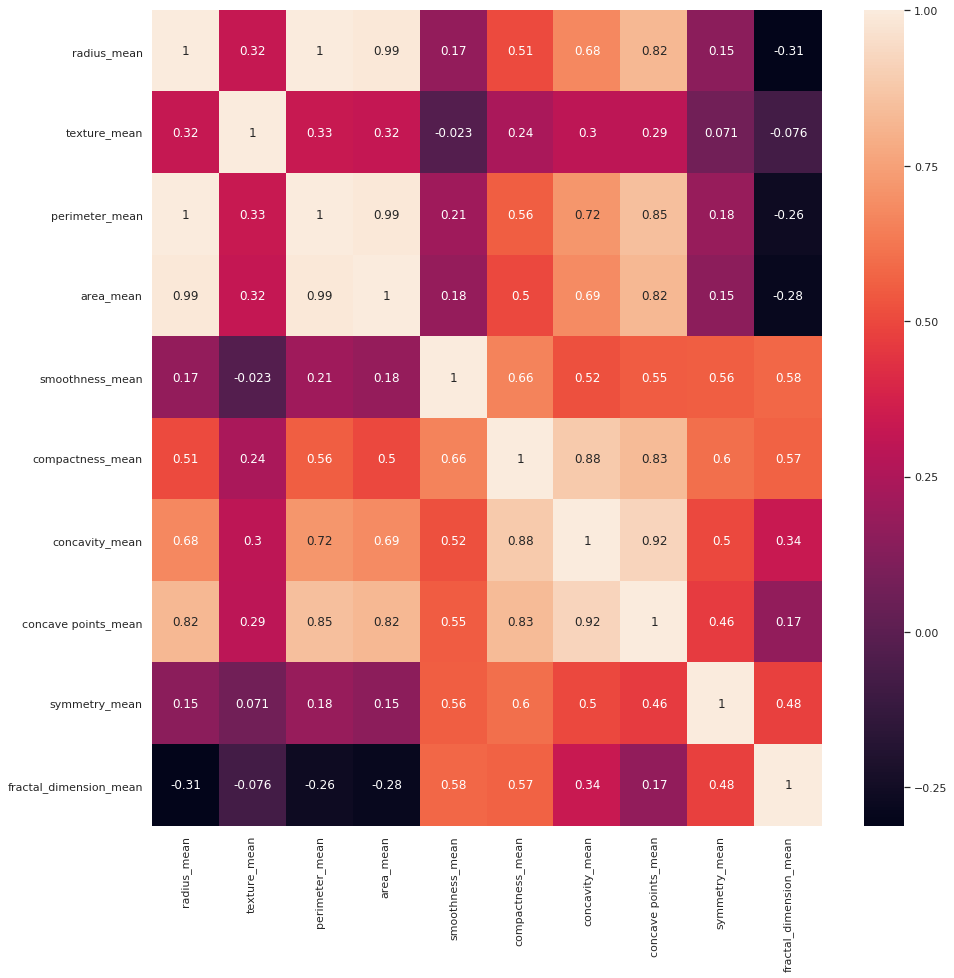

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize = (15,15))
sns.heatmap(corrmtx, annot= True)

#### Machine Learning

Split Data to Train/Test Sets

Create train/test sets using the train_test_split function. The test_size=0.3 inside the function indicates the percentage of the data that should be held over for testing.

In [0]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.drop(columns = 'diagnosis')
y = df['diagnosis']

scale= StandardScaler()
X_std = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state = 59)

#### Principal Component Analysis (PCA) step

PCA is used as a preprocessing step

The main purpose of principal component analysis is to:

- identify hidden pattern in a data  
- reduce the dimensionnality of the data by removing the noise and redundant features
- identify correlated variables  


In [10]:
import numpy as np

# create correlation matrix
corr_matrix = X.corr().abs()

# select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# find features with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.80)]

# drop features
dr_X = X.drop(to_drop, axis=1)
dr_X.shape



(569, 13)

In [0]:
dr_X.corr()

In [13]:
X_train.shape

(398, 30)

In [0]:
pca = PCA(n_components= 2)
pca_components = pca.fit_transform(X_train)


In [0]:
# Use your PCA components in a classifier model
from sklearn.cluster import KMeans, DBSCAN

dsc = DBSCAN()
X_DB = dsc.fit_predict(pca_components)

In [0]:
kmn = KMeans(n_clusters= 2)
X_kmn = kmn.fit_predict(pca_components)

In [37]:
pca_components.shape

(398, 2)

In [25]:
X_DB.shape

(398,)

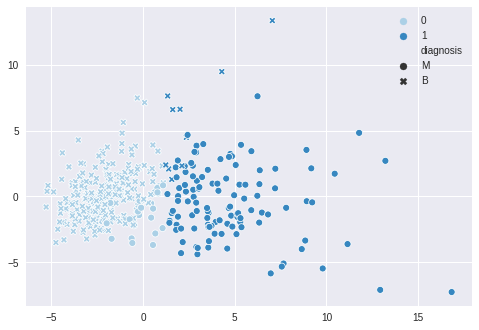

In [42]:
sns.scatterplot(x = pca_components[:,0], y = pca_components[:,1], hue= X_kmn, palette = 'Blues', style= y_train)

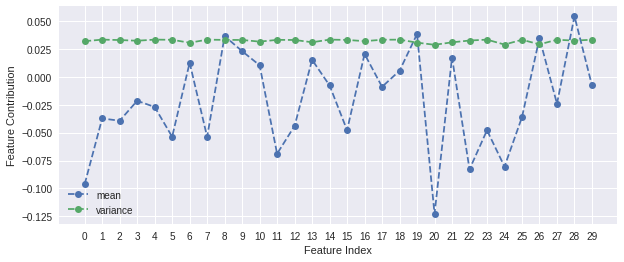

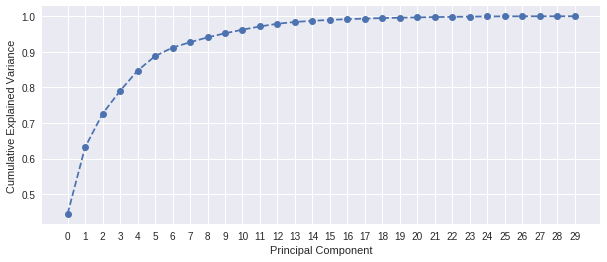

In [18]:
# Use the following helper function to evaluate your PCA model

n_components = 30

pca_inversed_data = pca.inverse_transform(np.eye(n_components))

plt.style.use('seaborn')

def plot_pca():
    plt.figure(figsize=(10, 4))
    plt.plot(pca_inversed_data.mean(axis=0), '--o', label = 'mean')
    plt.plot(np.square(pca_inversed_data.std(axis=0)), '--o', label = 'variance')
    plt.ylabel('Feature Contribution')
    plt.xlabel('Feature Index')
    plt.legend(loc='best')
    plt.xticks(np.arange(0, 30, 1.0))
    plt.show()

    plt.figure(figsize = (10, 4))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), '--o')
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulative Explained Variance')
    plt.xticks(np.arange(0, 30, 1.0))
    plt.show()

plot_pca()

In [0]:
pca_6 = PCA(n_components= 6)

pca_6_components = pca_6.fit_transform(X_train)

In [0]:
kmn_6 = kmn.fit_predict(pca_6_components)

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(y_train)

tf_y = le.transform(y_train)

confusion_matrix(tf_y, kmn_6)

array([[249,  10],
       [ 25, 114]])

In [57]:
confusion_matrix(tf_y, X_kmn)

array([[249,  10],
       [ 26, 113]])